In [1]:
import pandas as pd
import numpy as np

import networkx as nx 
import string


Network Example
https://stackoverflow.com/questions/13513455/drawing-a-graph-or-a-network-from-a-distance-matrix

In [2]:
dt = [('len', float)]
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10
A = A.view(dt)
A

array([[(0.,), (3.,), (4.,), (7.,)],
       [(3.,), (0.,), (9.,), (2.,)],
       [(4.,), (9.,), (0.,), (1.,)],
       [(7.,), (2.,), (1.,), (0.,)]], dtype=[('len', '<f8')])

In [3]:
G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))

 
G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('result/out_example.png', format='png', prog='neato')

NJ Matrix Sample -> Matrix

In [4]:

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

WikiData = StringIO(
"""a,b,c,d,e,a1,a2,b1
a,0,5,9,9,8,0,0,5
b,5,0,10,10,9,5,5,0
c,9,10,0,8,7,9,9,10
d,9,10,8,0,3,9,9,10
e,8,9,7,3,0,8,8,9
a1,0,5,9,9,8,0,0,5
a2,0,5,9,9,8,0,0,5
b1,5,0,10,10,9,5,5,0
    """)


# WikiData = StringIO(
# """a,b,c,d,e
# a,0,5,9,9,8
# b,5,0,10,10,9
# c,9,10,0,8,7
# d,9,10,8,0,3
# e,8,9,7,3,0
#     """)

df = pd.read_csv(WikiData, sep=",")
df

,a,b,c,d,e,a1,a2,b1
a,0,5,9,9,8,0,0,5
b,5,0,10,10,9,5,5,0
c,9,10,0,8,7,9,9,10
d,9,10,8,0,3,9,9,10
e,8,9,7,3,0,8,8,9
a1,0,5,9,9,8,0,0,5
a2,0,5,9,9,8,0,0,5
b1,5,0,10,10,9,5,5,0


In [5]:
#collect duplicated cases
a = df.duplicated(keep=False) 

dupes = df[a]
#print(dupes)

dupes = dupes.groupby(list(df)).apply(lambda x: list(x.index)).tolist()
dupes

[['a', 'a1', 'a2'], ['b', 'b1']]

In [6]:
#create merged col names
cols = list(df.columns)
cols

for idx, str in enumerate(cols):
    for dupe in dupes:
        if any([x in str for x in dupe]):
            cols[idx] = '/'.join(dupe)

cols = list(dict.fromkeys(cols))
cols

['a/a1/a2', 'b/b1', 'c', 'd', 'e']

In [7]:
# Search matching cases
#https://stackoverflow.com/questions/3389574/check-if-multiple-strings-exist-in-another-string

# a_str ='a'
# dupes = ['a', 'a1', 'a2']

# if any([x in a_str for x in dupes]):
#     print(a_str)

In [8]:
#drop dupes
df = df.T.drop_duplicates().T
df.drop_duplicates(inplace=True)
df

,a,b,c,d,e
a,0,5,9,9,8
b,5,0,10,10,9
c,9,10,0,8,7
d,9,10,8,0,3
e,8,9,7,3,0


In [9]:
df.columns = cols
df.index = cols
df

dict = {}
for i, col in enumerate(cols):
    dict[i] = col
dict

{0: 'a/a1/a2', 1: 'b/b1', 2: 'c', 3: 'd', 4: 'e'}

In [10]:
M = df.to_numpy()

dt = [('len', int)]
M = M.view(dt)

M

array([[( 0,), ( 5,), ( 9,), ( 9,), ( 8,)],
       [( 5,), ( 0,), (10,), (10,), ( 9,)],
       [( 9,), (10,), ( 0,), ( 8,), ( 7,)],
       [( 9,), (10,), ( 8,), ( 0,), ( 3,)],
       [( 8,), ( 9,), ( 7,), ( 3,), ( 0,)]], dtype=[('len', '<i8')])

In [11]:
#Draw Network

G = nx.from_numpy_matrix(M)
G = nx.relabel_nodes(G, dict)    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('result/out.png', format='png', prog='neato')

In [12]:
print(G)

strict graph "" {
	node [color=red,
		style=filled
	];
	edge [color=blue,
		width=2.0
	];
	"a/a1/a2" -- "b/b1"	[len=5];
	"a/a1/a2" -- c	[len=9];
	"a/a1/a2" -- d	[len=9];
	"a/a1/a2" -- e	[len=8];
	"b/b1" -- c	[len=10];
	"b/b1" -- d	[len=10];
	"b/b1" -- e	[len=9];
	c -- d	[len=8];
	c -- e	[len=7];
	d -- e	[len=3];
}



Draw network w/ dummy data

In [13]:
mtr_new = pd.read_csv('result/dist_new_full.csv')

mtr_new = mtr_new*10
mtr_new

,A1,A2,A3,A4,A+B,B,C,D1,D2,Outlier
A1,0.000000,0.000000,0.000000,0.000000,10.000000,23.076923,30.000000,46.153846,46.153846,100
A2,0.000000,0.000000,0.000000,0.000000,10.000000,23.076923,30.000000,46.153846,46.153846,100
A3,0.000000,0.000000,0.000000,0.000000,10.000000,23.076923,30.000000,46.153846,46.153846,100
A4,0.000000,0.000000,0.000000,0.000000,10.000000,23.076923,30.000000,46.153846,46.153846,100
A+B,10.000000,10.000000,10.000000,10.000000,0.000000,30.769231,22.222222,41.666667,41.666667,100
B,23.076923,23.076923,23.076923,23.076923,30.769231,0.000000,46.153846,23.076923,23.076923,100
C,30.000000,30.000000,30.000000,30.000000,22.222222,46.153846,0.000000,30.000000,30.000000,100
D1,46.153846,46.153846,46.153846,46.153846,41.666667,23.076923,30.000000,0.000000,0.000000,100
D2,46.153846,46.153846,46.153846,46.153846,41.666667,23.076923,30.000000,0.000000,0.000000,100
Outlier,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0


In [14]:
df = mtr_new

In [15]:
#collect duplicated cases
a = df.duplicated(keep=False) 

dupes = df[a]
#print(dupes)


## todo: error when there's no dup
dupes = dupes.groupby(list(df)).apply(lambda x: list(x.index))
dupes


#create merged col names
cols = list(df.columns)
cols

for idx, str in enumerate(cols):
    for dupe in dupes:
        if any([x in str for x in dupe]):
            cols[idx] = '/'.join(dupe)

cols = list(dict.fromkeys(cols))
cols


#drop dupes
df = df.T.drop_duplicates().T
df.drop_duplicates(inplace=True)
df


df.columns = cols
df.index = cols
df




,A1/A2/A3/A4,A+B,B,C,D1/D2,Outlier
A1/A2/A3/A4,0.000000,10.000000,23.076923,30.000000,46.153846,100.0
A+B,10.000000,0.000000,30.769231,22.222222,41.666667,100.0
B,23.076923,30.769231,0.000000,46.153846,23.076923,100.0
C,30.000000,22.222222,46.153846,0.000000,30.000000,100.0
D1/D2,46.153846,41.666667,23.076923,30.000000,0.000000,100.0
Outlier,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [18]:
dict = {}
for i, col in enumerate(cols):
    dict[i] = col
dict



M = df.to_numpy()

dt = [('len', int)]
M = M.view(dt)

M

array([[(                  0,), (4621819117588971520,),
        (4627188794074254995,), (4629137466983448576,),
        (4631692393701625491,), (4636737291354636288,)],
       [(4621819117588971520,), (                  0,),
        (4629353986204963696,), (4626948217158332919,),
        (4631060879328995975,), (4636737291354636288,)],
       [(4627188794074254995,), (4629353986204963696,),
        (                  0,), (4631692393701625491,),
        (4627188794074254995,), (4636737291354636288,)],
       [(4629137466983448576,), (4626948217158332919,),
        (4631692393701625491,), (                  0,),
        (4629137466983448576,), (4636737291354636288,)],
       [(4631692393701625491,), (4631060879328995975,),
        (4627188794074254995,), (4629137466983448576,),
        (                  0,), (4636737291354636288,)],
       [(4636737291354636288,), (4636737291354636288,),
        (4636737291354636288,), (4636737291354636288,),
        (4636737291354636288,), (          

In [19]:
#Draw Network

G = nx.from_numpy_matrix(M)
G = nx.relabel_nodes(G, dict)    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="1.0")

G.draw('result/out_dummy.png', format='png', prog='neato')


###todo: graph nodes too big! or layout too small..

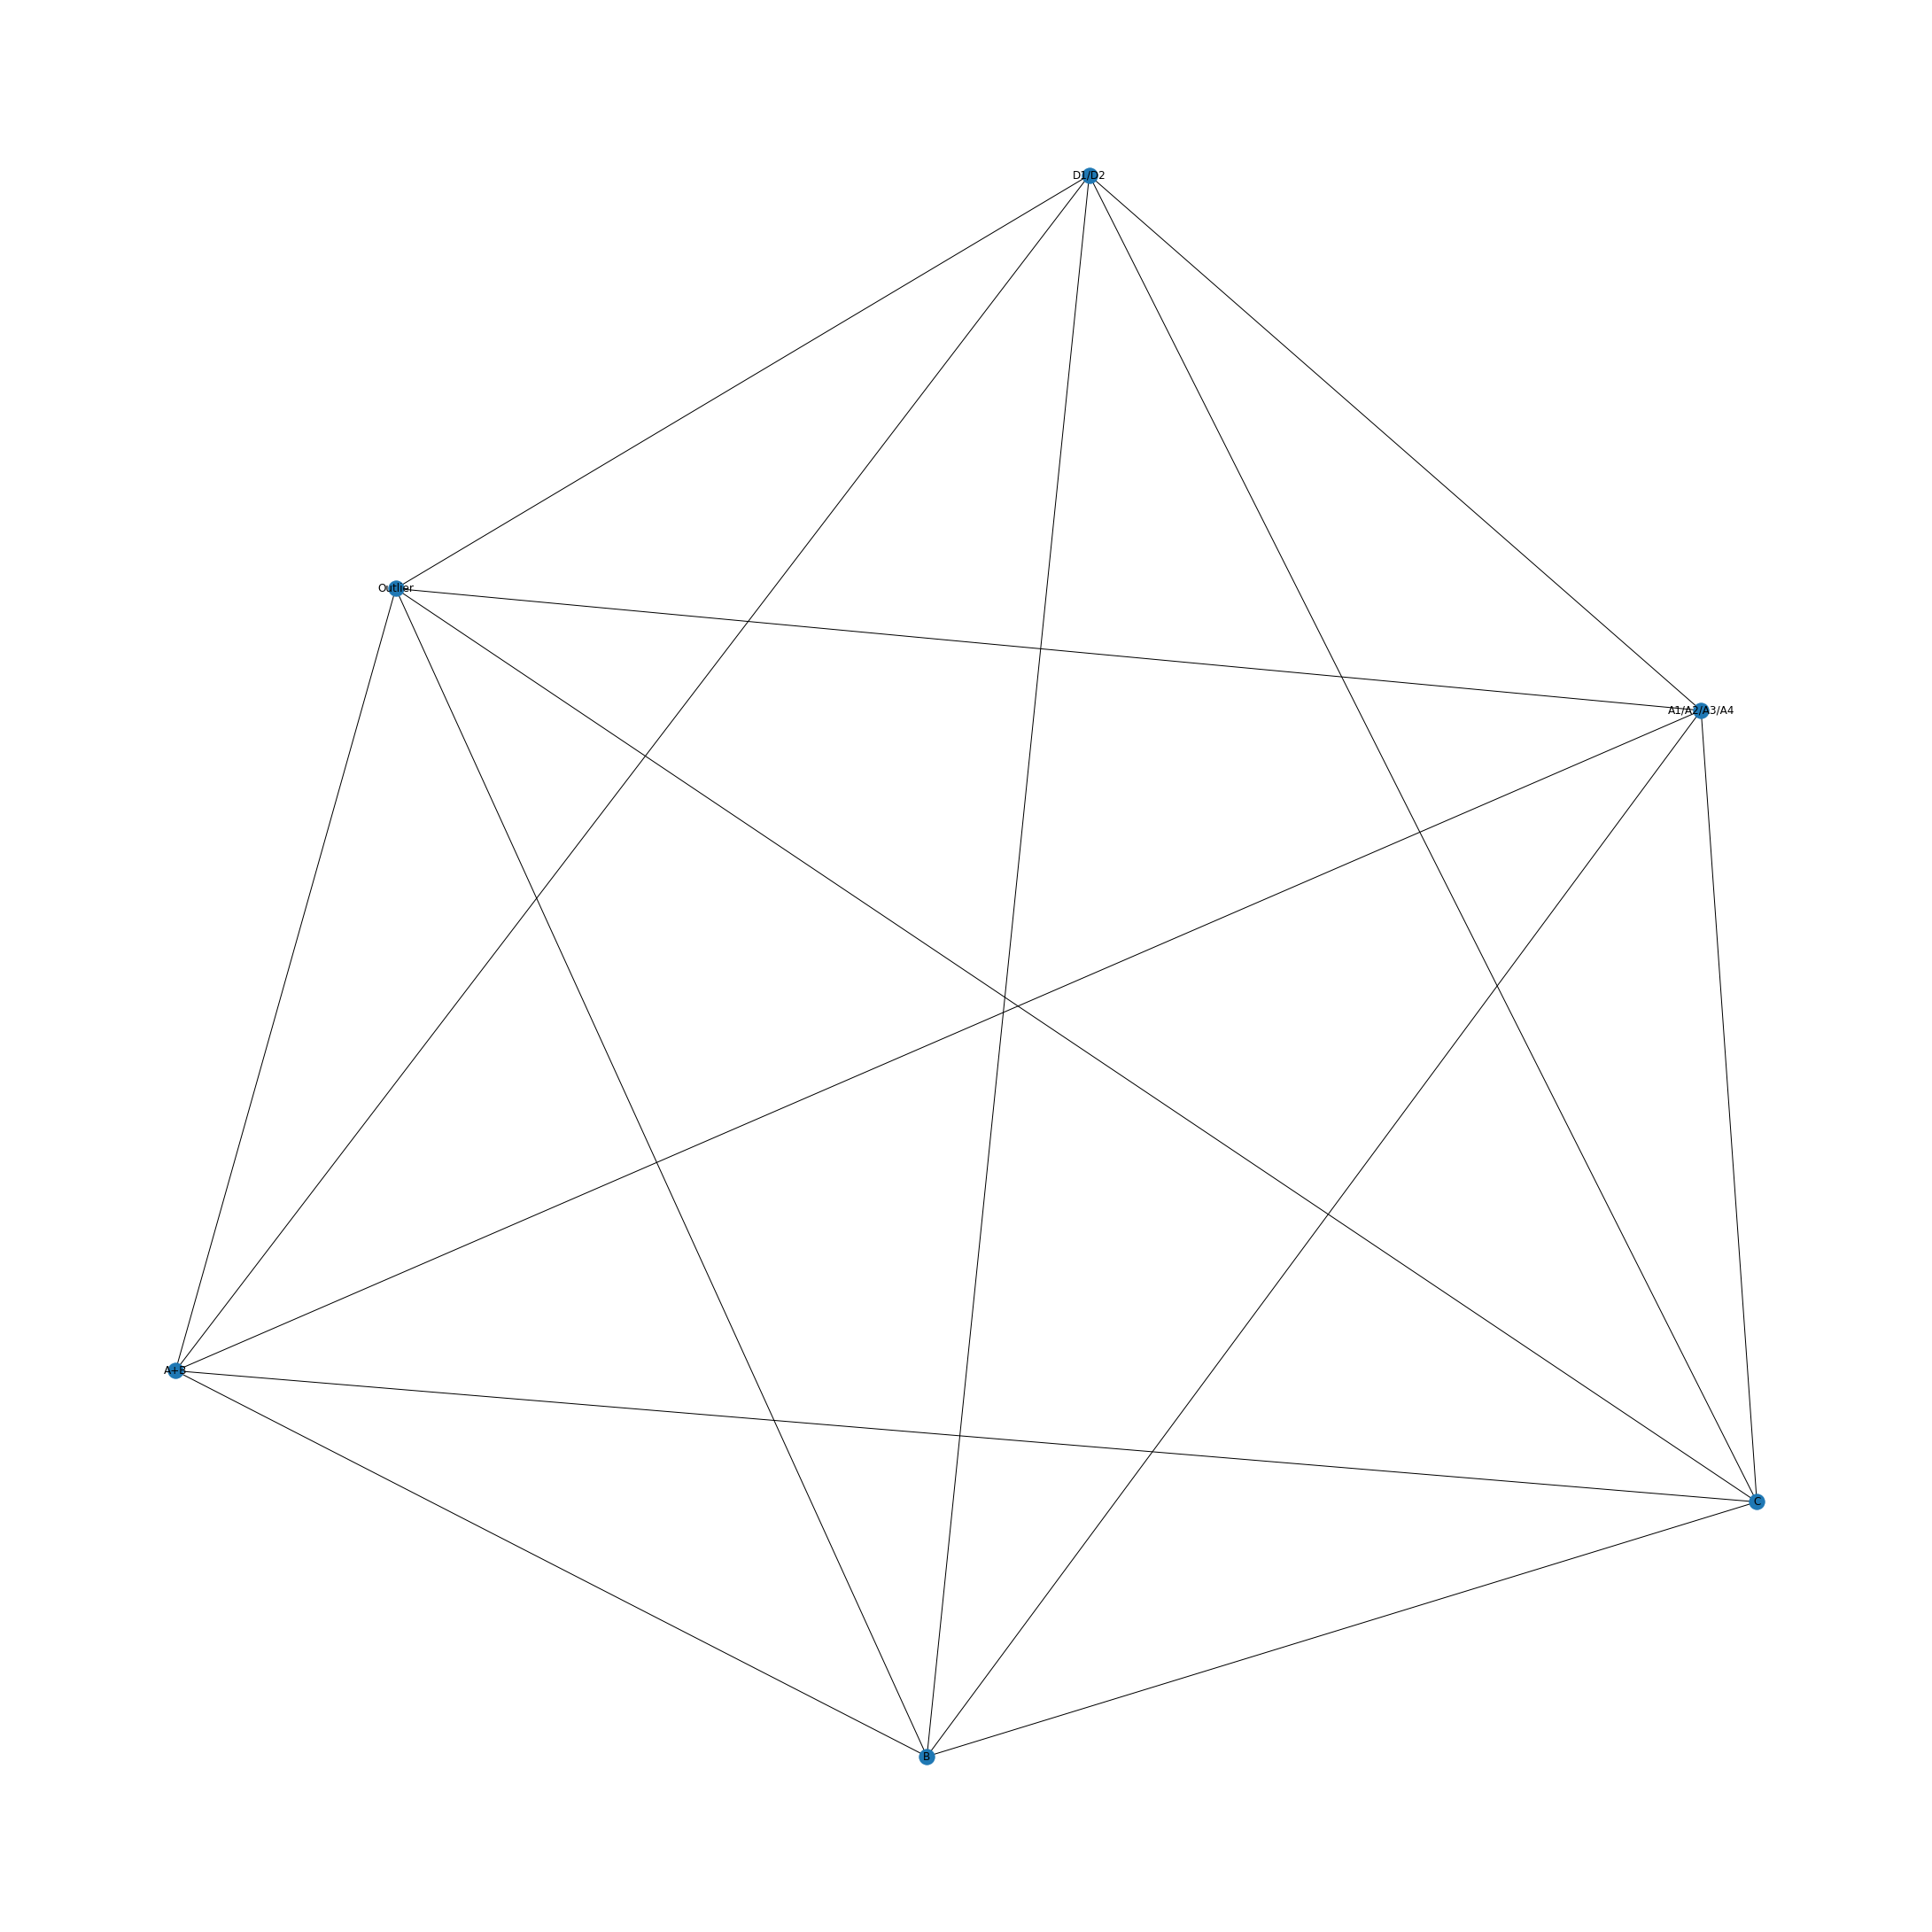

In [21]:
#Draw Network

G = nx.from_numpy_matrix(M)
G = nx.relabel_nodes(G, dict)    

A = nx.drawing.nx_agraph.to_agraph(G) #Returns a pygraphviz graph from a NetworkX graph N.

A.node_attr.update(color="red", style="filled")
A.edge_attr.update(color="blue", width="2.0", len=3)
A.edge_attr.update(len=3)

#G.draw('result/out_dummy.png', format='png', prog='neato')
A.layout()
A.draw('result/out_dummy.png')


#####
# plot
#doesn't reflect distance..
# g=G
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(g, k=0.3*1/np.sqrt(len(g.nodes())), iterations=20)
# plt.figure(3, figsize=(30, 30))
# nx.draw(g, pos=pos)
# nx.draw_networkx_labels(g, pos=pos)
# plt.show()

